In [1]:
import torch
from torch import optim, nn
import numpy as np
from utils.loader import ScatterData, train_test_split_torch,train_test_split_torch_stratify
import matplotlib.pyplot as plt
from torchvision.transforms import Compose, Resize, InterpolationMode, ToTensor
from models.generator import get_model
from models.training import train
from tqdm.auto import tqdm
import os
from glob import glob

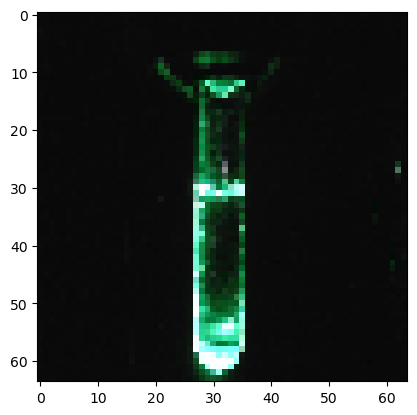

In [3]:
dset=ScatterData(path=r'C:\Users\sedau\Desktop\AIC Group\Experiments\DATA\LASER_SCREEN_IMAGES\Second Setup\520nm 1 con',
                 transform=Compose([ToTensor(),
                                    Resize([64,64],interpolation=InterpolationMode.NEAREST)]),
                 verbose=False)

train_loader,valid_loader=train_test_split_torch(dset,validation_split=0.2,shuffle_dataset=True,batch_size=5)

(x,y)=dset[10]
x=x.permute(1,2,0).numpy()
x=x*127.5+127.5
plt.imshow(x.astype('uint'))

In [5]:
os.chdir(r'C:\Users\sedau\Desktop\AIC Group\Experiments\DATA\LASER_SCREEN_IMAGES\Second Setup\520nm 1 con')
lst=glob('*.jpg')
count=0
lst_soluble=[]
for file in lst:
    f=file.split('_')[-2]
    if f=='INSOLUBLE' : count+=1
    if f=='SOLUBLE' : lst_soluble.append(file)
print('total file : ',len(lst))
print('soluble {}% & insoluble {}%'.format(round((len(lst)-count)/len(lst)*100,3),round(count/len(lst)*100),3))

total file :  36
soluble 47.222% & insoluble 53%


In [6]:
model_resnet=get_model('resnet18',feat=64)

In [7]:
lr = 1e-3
history = train(model=model_resnet,
      optimizer=torch.optim.Adam(model_resnet.parameters(), lr=lr),
      loss_fn=nn.BCELoss(),
      train_loader=train_loader,
      valid_loader=valid_loader,
      epochs=10,
      device='cpu',
      verbose=True,
      path=r'C:\Users\sedau\Desktop\AIC Group\ML\HSP_ML_seda\weights',
      fname = 'solubility_lr_'+str(lr),
      update=1)

 10%|█         | 1/10 [00:05<00:45,  5.05s/it]

epoch: 0,train loss: 1.209053186699748, valid loss: 0.016393018420785666, train acc: 0.9655172413793104, valid acc: 1.0


 20%|██        | 2/10 [00:12<00:52,  6.60s/it]

epoch: 1,train loss: 0.05910799541743472, valid loss: 0.0009206303802784532, train acc: 1.0, valid acc: 1.0


 30%|███       | 3/10 [00:19<00:48,  6.89s/it]

epoch: 2,train loss: 0.0039739430212648585, valid loss: 0.0003473512115306221, train acc: 1.0, valid acc: 1.0


 40%|████      | 4/10 [00:26<00:39,  6.62s/it]

epoch: 3,train loss: 0.002737315313424915, valid loss: 0.0001582473996677436, train acc: 1.0, valid acc: 1.0


 50%|█████     | 5/10 [00:33<00:34,  6.88s/it]

epoch: 4,train loss: 0.00015636196326340723, valid loss: 3.888676474161912e-05, train acc: 1.0, valid acc: 1.0


 60%|██████    | 6/10 [00:39<00:26,  6.74s/it]

epoch: 5,train loss: 0.00024697184494471003, valid loss: 1.692784917395329e-05, train acc: 1.0, valid acc: 1.0


 70%|███████   | 7/10 [00:46<00:19,  6.66s/it]

epoch: 6,train loss: 0.000362232741963453, valid loss: 1.4233661659091013e-05, train acc: 1.0, valid acc: 1.0


 80%|████████  | 8/10 [00:53<00:13,  6.73s/it]

epoch: 7,train loss: 0.00046466891399177257, valid loss: 6.616141952520138e-06, train acc: 1.0, valid acc: 1.0


 90%|█████████ | 9/10 [00:59<00:06,  6.61s/it]

epoch: 8,train loss: 0.0001232391336998262, valid loss: 7.069132834658376e-06, train acc: 1.0, valid acc: 1.0


100%|██████████| 10/10 [01:06<00:00,  6.68s/it]

epoch: 9,train loss: 0.0002711583911150228, valid loss: 6.3300312831415795e-06, train acc: 1.0, valid acc: 1.0


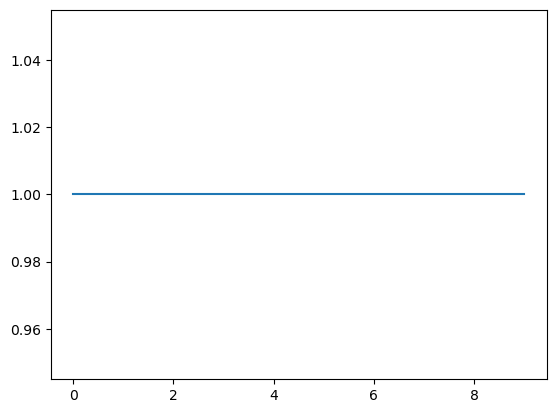

In [8]:
plt.plot(history.test_acc)

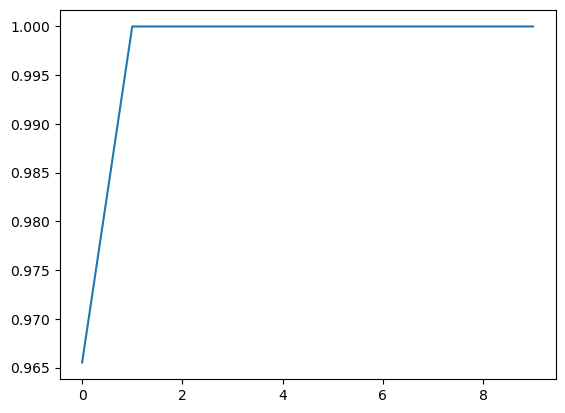

In [9]:
plt.plot(history.train_acc)